In [62]:
import locale
from helpers import tools
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter
import seaborn as sns

pd.options.mode.copy_on_write = True

# Set locale to German
locale.setlocale(locale.LC_TIME, "de_DE.utf8")

# Apply the default theme
sns.set_theme()

def save_data():
    df = pd.DataFrame()

    for city in ["duesseldorf", "kiel", "dresden"]:
        city_df = tools.retrieveSlotData(city=city, concern=None)
        df = pd.concat([df, city_df])

    df.to_csv("db/data.csv")


# save_data()

df = tools.read_data_from_csv()

df["days_open"] = df["total_delta"].dt.total_seconds() / 3600 / 24

df["days_until_slot"] = df["time_until_slot"].dt.total_seconds() / 3600 / 24

df.loc[:, "taken_hour"] = df.loc[:, "taken"].dt.hour
df.loc[:, "available_hour"] = df.loc[:, "available"].dt.hour

In [63]:
concern = "Personalausweis - Antrag"
df = df[df["concern"] == concern]

dresden = df[(df["city"] == "Dresden") & (df["concern"] == "Personalausweis - Antrag")]
kiel = df[(df["city"] == "Kiel") & (df["concern"] == "Personalausweis - Antrag")]
duesseldorf = df[(df["city"] == "Düsseldorf") & (df["concern"] == "Personalausweis - Antrag")]

In [64]:
kiel.describe()

,Unnamed: 0,s_id,timeslot,a_id,available,taken,count_availabilities,hour,delta,time_until_slot,total_delta,days_open,days_until_slot,taken_hour,available_hour
count,31144.000000,31144.000000,31144,31144.000000,31144,29012,31144.000000,31144.000000,29012,29012,31144,31144.000000,29012.000000,29012.000000,31144.000000
mean,66766.417480,15506.115753,2024-12-05 01:48:25.166324224,66767.417480,2024-11-21 02:09:03.377215232,2024-11-22 08:25:27.348683264,5.025880,11.614147,2 days 03:06:11.583482696,11 days 07:07:08.710878257,8 days 08:38:05.332648343,8.359784,11.296629,10.840687,9.574782
min,0.000000,1.000000,2024-11-08 10:00:00,1.000000,2024-11-08 09:29:00,2024-11-08 09:48:00,1.000000,7.000000,0 days 00:01:00,-1 days +23:56:00,0 days 00:00:00,0.000000,-0.002778,0.000000,0.000000
25%,28190.750000,2085.750000,2024-11-26 08:25:00,28191.750000,2024-11-12 01:18:00,2024-11-15 01:19:00,3.000000,9.000000,0 days 00:02:00,2 days 14:31:45,0 days 18:06:00,0.754167,2.605382,7.000000,5.000000
50%,67523.000000,16651.000000,2024-12-03 17:30:00,67524.000000,2024-11-21 00:18:30,2024-11-21 11:17:00,5.000000,11.000000,0 days 09:26:00,9 days 20:48:00,5 days 08:01:00,5.334028,9.866667,11.000000,9.000000
75%,100635.250000,25279.000000,2024-12-12 14:01:15,100636.250000,2024-11-28 18:22:00,2024-11-29 08:55:00,7.000000,14.000000,2 days 12:15:00,19 days 03:03:30,14 days 18:16:45,14.761632,19.127431,15.000000,14.000000
max,138747.000000,40242.000000,2025-01-07 17:45:00,138748.000000,2024-12-10 00:02:00,2024-12-10 01:01:00,18.000000,17.000000,25 days 03:02:00,28 days 16:51:00,26 days 00:02:00,26.001389,28.702083,23.000000,23.000000
std,40019.712068,11674.665100,NaN,40019.712068,NaN,NaN,2.994494,2.733612,3 days 16:49:25.441028049,9 days 02:47:43.273638651,8 days 00:51:50.704006959,8.036004,9.116473,6.292766,6.223852


In [65]:
concerns = [
    "Personalausweis - Antrag",
    "Reisepass - Antrag",
    "Anmeldung",
    "Ummeldung",
    "Abmeldung",
]

concern = "Personalausweis - Antrag"
cities = ["Duesseldorf", "Dresden", "Kiel"]

/tmp/ipykernel_887173/3903368331.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[index].set_xticklabels(
/tmp/ipykernel_887173/3903368331.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[index].set_xticklabels(
/tmp/ipykernel_887173/3903368331.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[index].set_xticklabels(


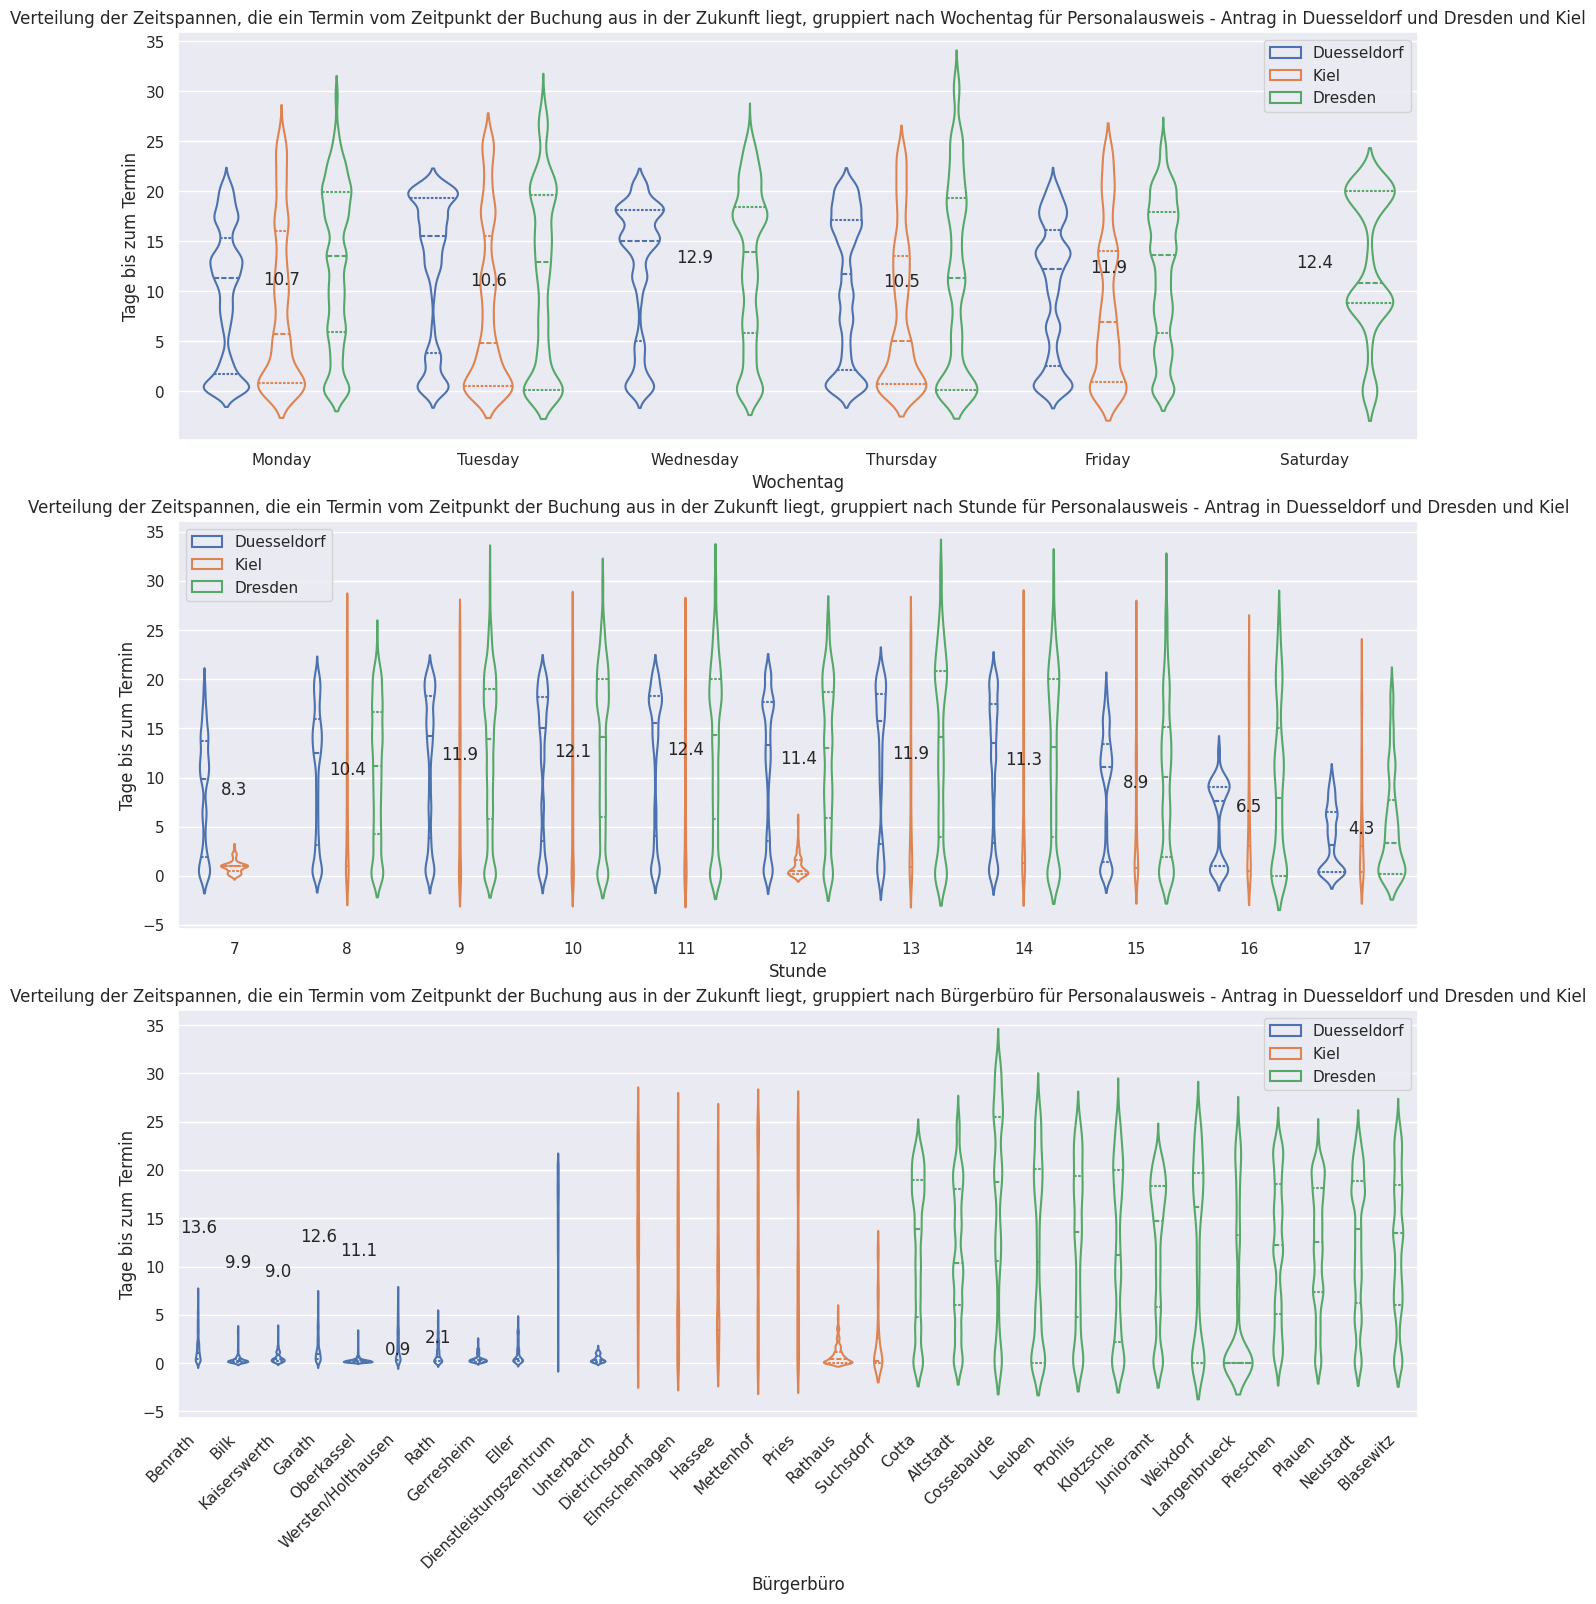

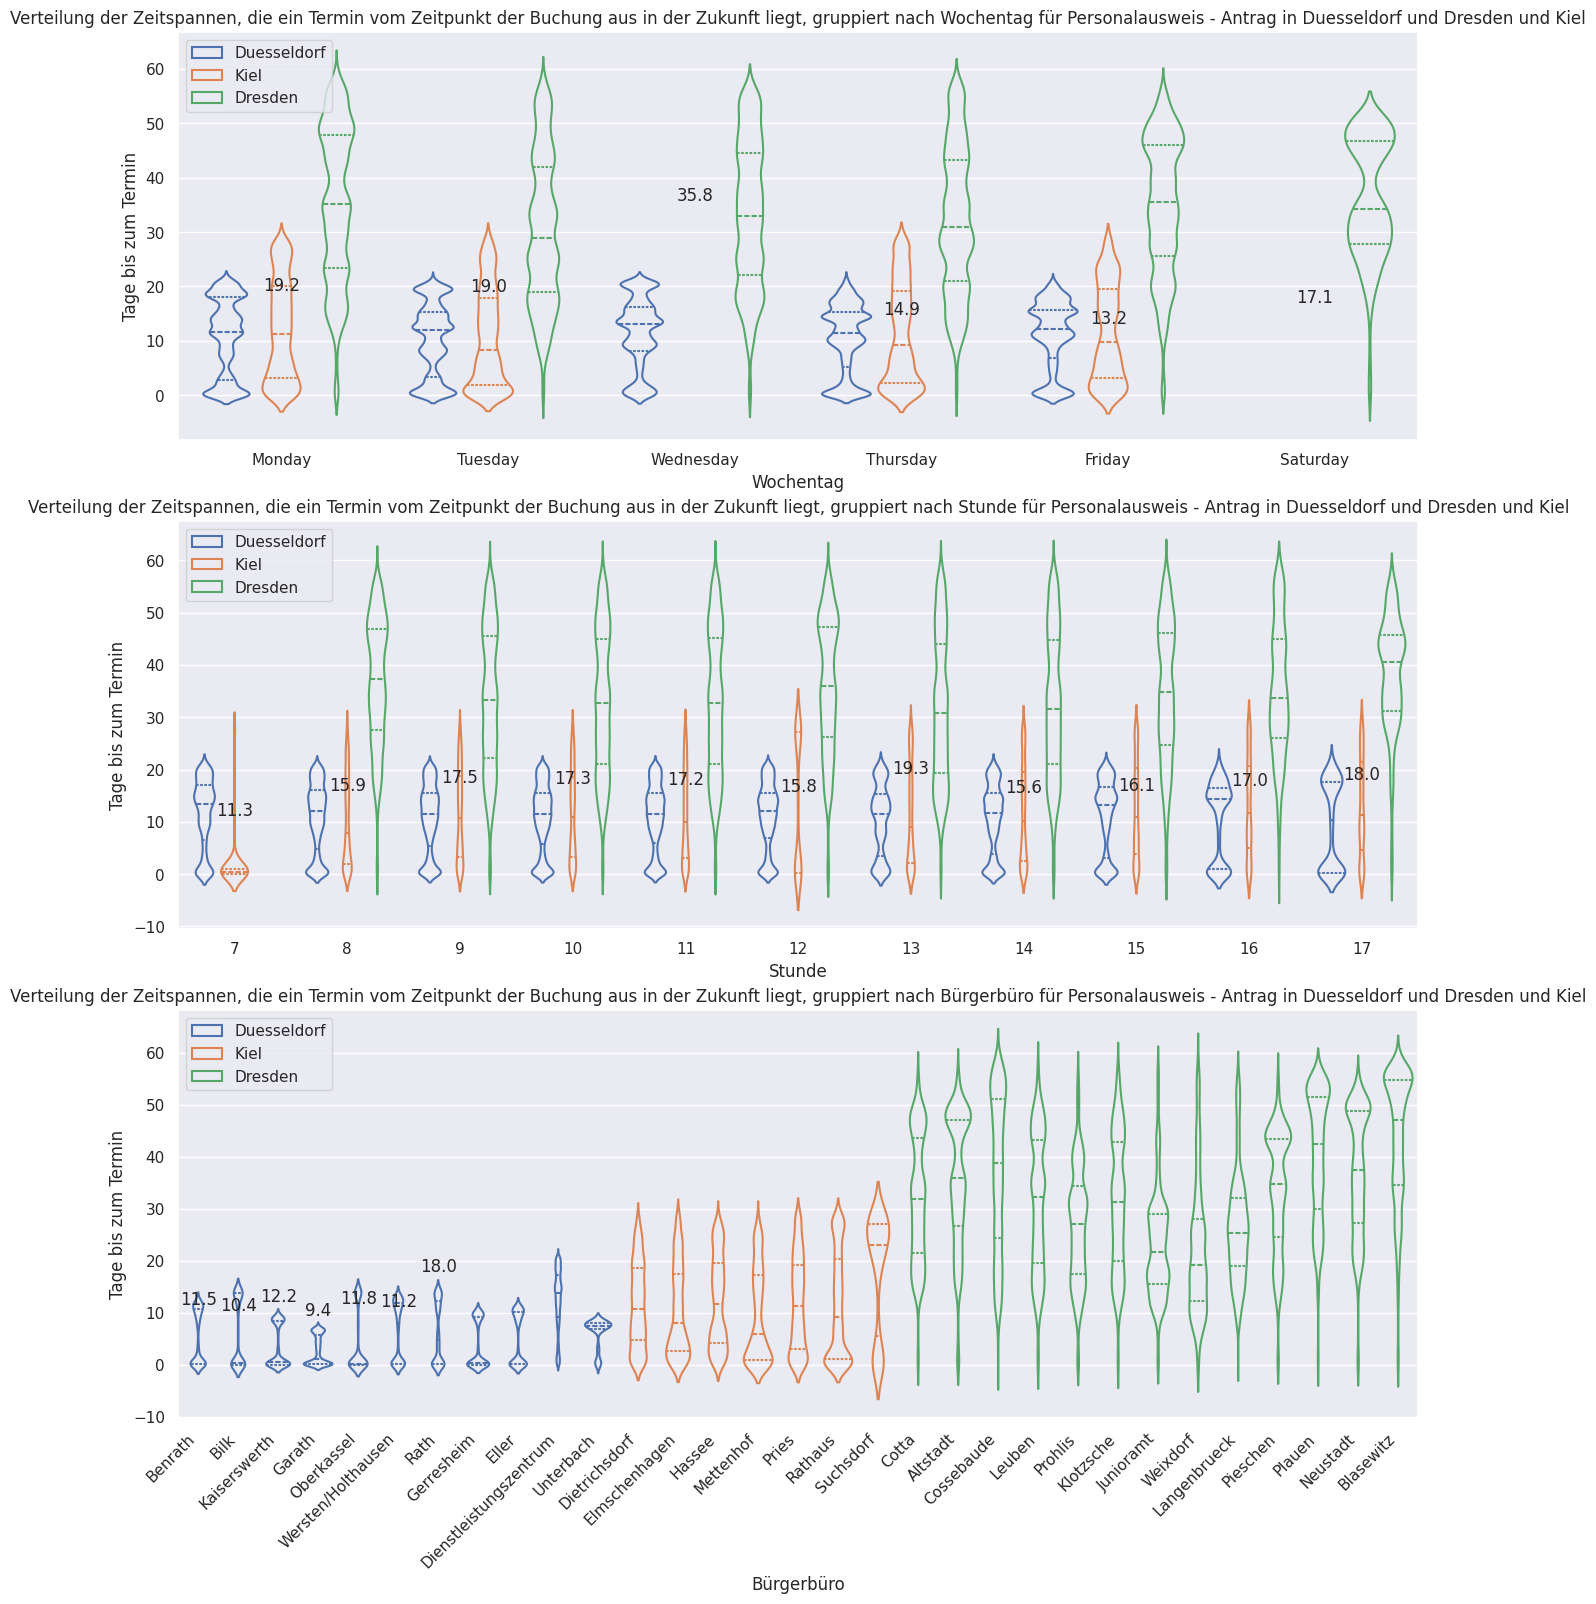

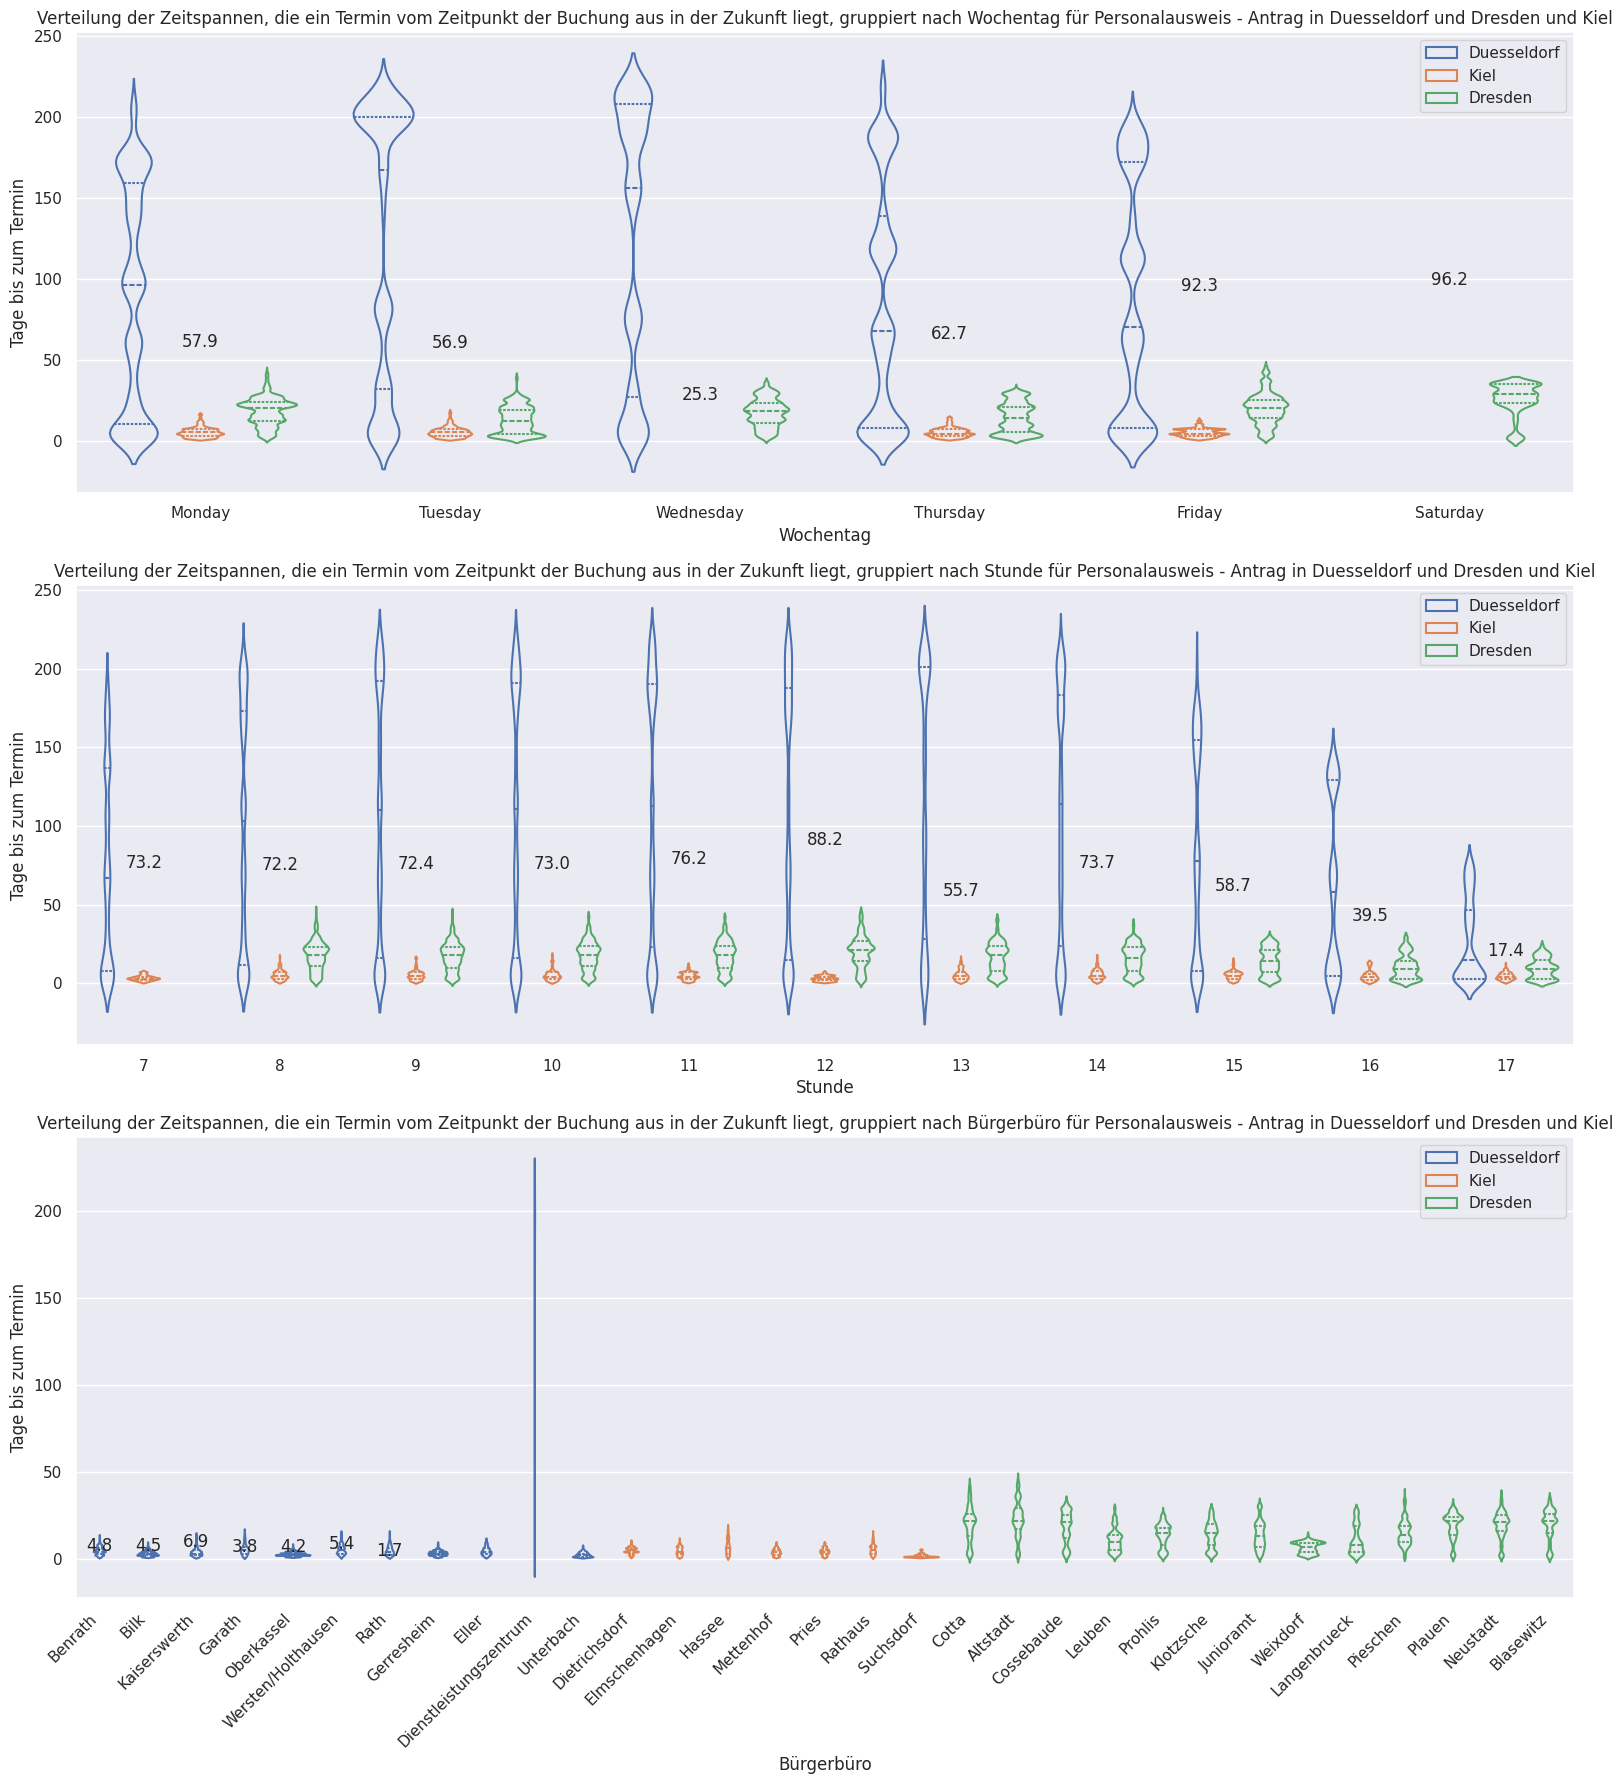

In [66]:
# categories = ["hour", "office"]
y_categories = ["days_open", "days_until_slot", "count_availabilities"]

# y_category = y_categories[2]

categories = ["weekday", "hour", "office"]
label = {"weekday": "Wochentag", "hour": "Stunde", "office": "Bürgerbüro"}

for y_category in y_categories:
    fig, ax = plt.subplots(
        figsize=(16, 6 * len(categories)), nrows=len(categories), ncols=1
    )
    for index, value_to_group_by in enumerate(categories):
        sns.violinplot(
            x=value_to_group_by,
            y=y_category,
            data=df,
            ax=ax[index],
            inner="quart",
            fill=False,
            hue="city",
            # split=True,
            gap=0.1,
            order=(
                [
                    "Monday",
                    "Tuesday",
                    "Wednesday",
                    "Thursday",
                    "Friday",
                    "Saturday",
                ]
                if value_to_group_by == "weekday"
                else None
            ),
        )

        if value_to_group_by == "office":
            for i, office in enumerate(kiel["office"].unique()):
                mean = df.groupby(value_to_group_by)[y_category].mean().loc[office]
                ax[index].text(
                    i,
                    mean,
                    f"{mean:.1f}",
                    # fontsize=12,
                    # color="black",
                    ha="center",
                )
        else:

            # text with mean value for each group in the violin plot at y = 10
            for i, group_name in enumerate(
                df.groupby(value_to_group_by)[y_category].mean().index
            ):
                mean_dz = mean = (
                    df.groupby(value_to_group_by)[y_category].mean().loc[group_name]
                )

                ax[index].text(
                    i,
                    mean_dz,
                    f"{mean_dz:.1f}",
                    # fontsize=12,
                    # color="black",
                    ha="center",
                )

        title = f"Verteilung der Zeitspannen, die ein Termin vom Zeitpunkt der Buchung aus in der Zukunft liegt, gruppiert nach {label[value_to_group_by]} für {concern} in {' und '.join(cities)}"
        ax[index].set_title(title)
        # ax[index].set_xlabel(
        #     f"{'Wochentag, an dem der Termin stattfindet' if value_to_group_by == 'weekday' else 'Stunde, zu der der Termin stattfindet'}"
        # )
        ax[index].set_xlabel(f"{label[value_to_group_by]}")
        if value_to_group_by == "office":
            ax[index].set_xticklabels(
                ax[index].get_xticklabels(), rotation=45, ha="right"
            )

        ax[index].set_ylabel("Tage bis zum Termin")

        ax[index].legend(
            title=None,
            handles=ax[index].get_legend_handles_labels()[0],
        )

plt.tight_layout()

# plt.savefig(
#     "./bachelorarbeit/bilder/violinplot_days_open.png", bbox_inches="tight"
# )
plt.show()

In [67]:
# kiel_only_first_available = kiel.groupby("s_id").min("available")
# kiel_only_last_taken = kiel.groupby("s_id").max("taken")

# dresden_only_first_available = dresden.groupby("s_id").min("available")
# dresden_only_last_taken = dresden.groupby("s_id").max("taken")

# duesseldorf_only_first_available = duesseldorf.groupby("s_id").min("available")
# duesseldorf_only_last_taken = duesseldorf.groupby("s_id").max("taken")


first_available_all = pd.DataFrame()
last_taken_all = pd.DataFrame()

for city in cities:
    first_available = df[df["city"] == city].groupby("s_id").min("available")
    first_available["city"] = city
    first_available_all = pd.concat([first_available_all, first_available])

    last_taken = df[df["city"] == city].groupby("s_id").max("taken")
    last_taken["city"] = city
    last_taken_all = pd.concat([last_taken_all, last_taken])

first_available_all

,Unnamed: 0,a_id,count_availabilities,hour,days_open,days_until_slot,taken_hour,available_hour,city
s_id,,,,,,,,,
5311,5310,5311,1,9,0.003472,0.002083,9.0,9.0,Duesseldorf
5312,5311,5312,1,9,0.006944,0.002083,9.0,9.0,Duesseldorf
5313,5312,5313,1,9,0.010417,0.002083,9.0,9.0,Duesseldorf
5314,5313,5314,1,9,0.013194,0.002778,9.0,9.0,Duesseldorf
5315,5314,5315,1,9,0.017361,0.002083,9.0,9.0,Duesseldorf
...,...,...,...,...,...,...,...,...,...
40238,138743,138744,1,16,0.000000,NaN,NaN,0.0,Kiel
40239,138744,138745,1,16,0.000000,NaN,NaN,0.0,Kiel
40240,138745,138746,1,16,0.000000,NaN,NaN,0.0,Kiel


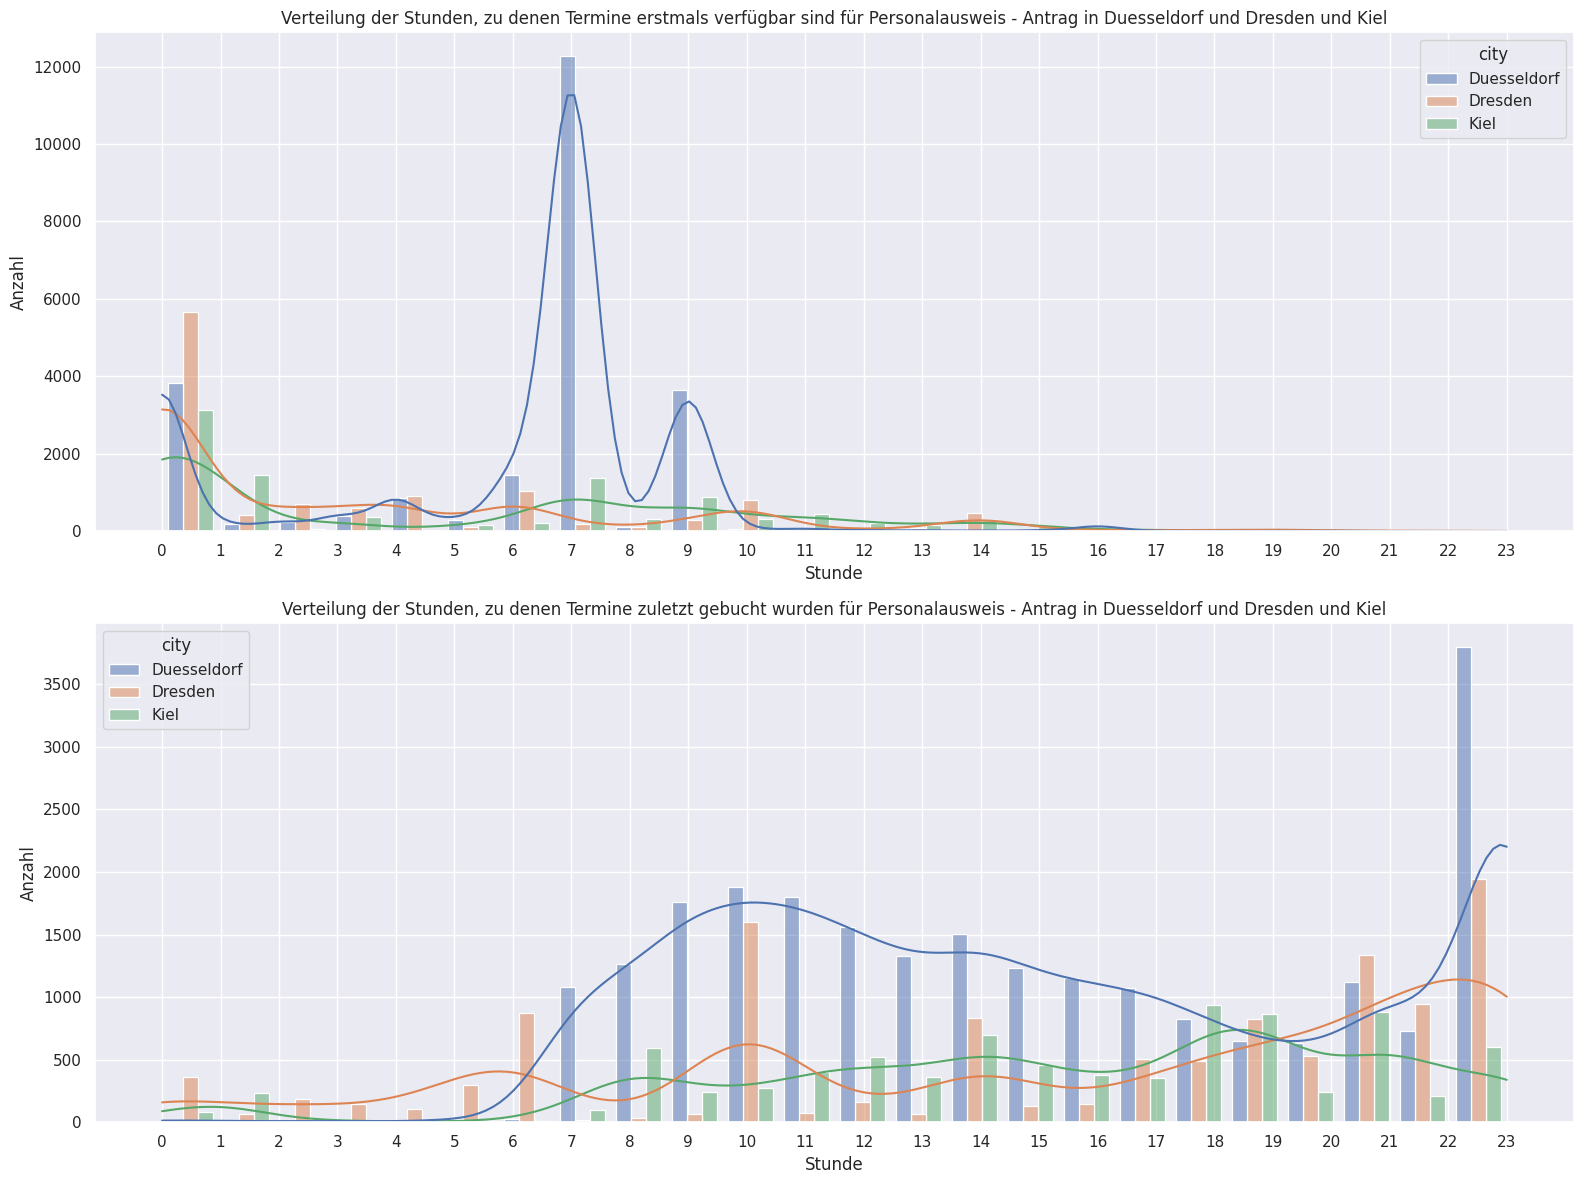

In [75]:
fig, axs = plt.subplots(figsize=(16, 12), nrows=2, ncols=1)

for i, plot_df in enumerate([first_available_all.reset_index(drop=True), last_taken_all.reset_index(drop=True)]):

    sns.histplot(
        data=plot_df,
        x="available_hour" if i == 0 else "taken_hour",
        bins=24,
        ax=axs[i],
        kde=True,
        multiple="dodge",
        shrink=0.8,
        hue="city",
    )
    axs[i].set_xlabel("Stunde")
    axs[i].set_xticks(range(0, 24))
    axs[i].set_ylabel("Anzahl")
    axs[i].set_title(
        f"Verteilung der Stunden, zu denen Termine {'erstmals verfügbar sind' if i == 0 else 'zuletzt gebucht wurden'} für {concern} in {' und '.join(cities)}"
    )

plt.tight_layout()
plt.show()

/tmp/ipykernel_887173/519172837.py:31: UserWarning: Mismatched number of handles and labels: len(handles) = 0 len(labels) = 2
  axs[index].legend(
/tmp/ipykernel_887173/519172837.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[index].legend(
/tmp/ipykernel_887173/519172837.py:31: UserWarning: Mismatched number of handles and labels: len(handles) = 0 len(labels) = 2
  axs[index].legend(
/tmp/ipykernel_887173/519172837.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[index].legend(


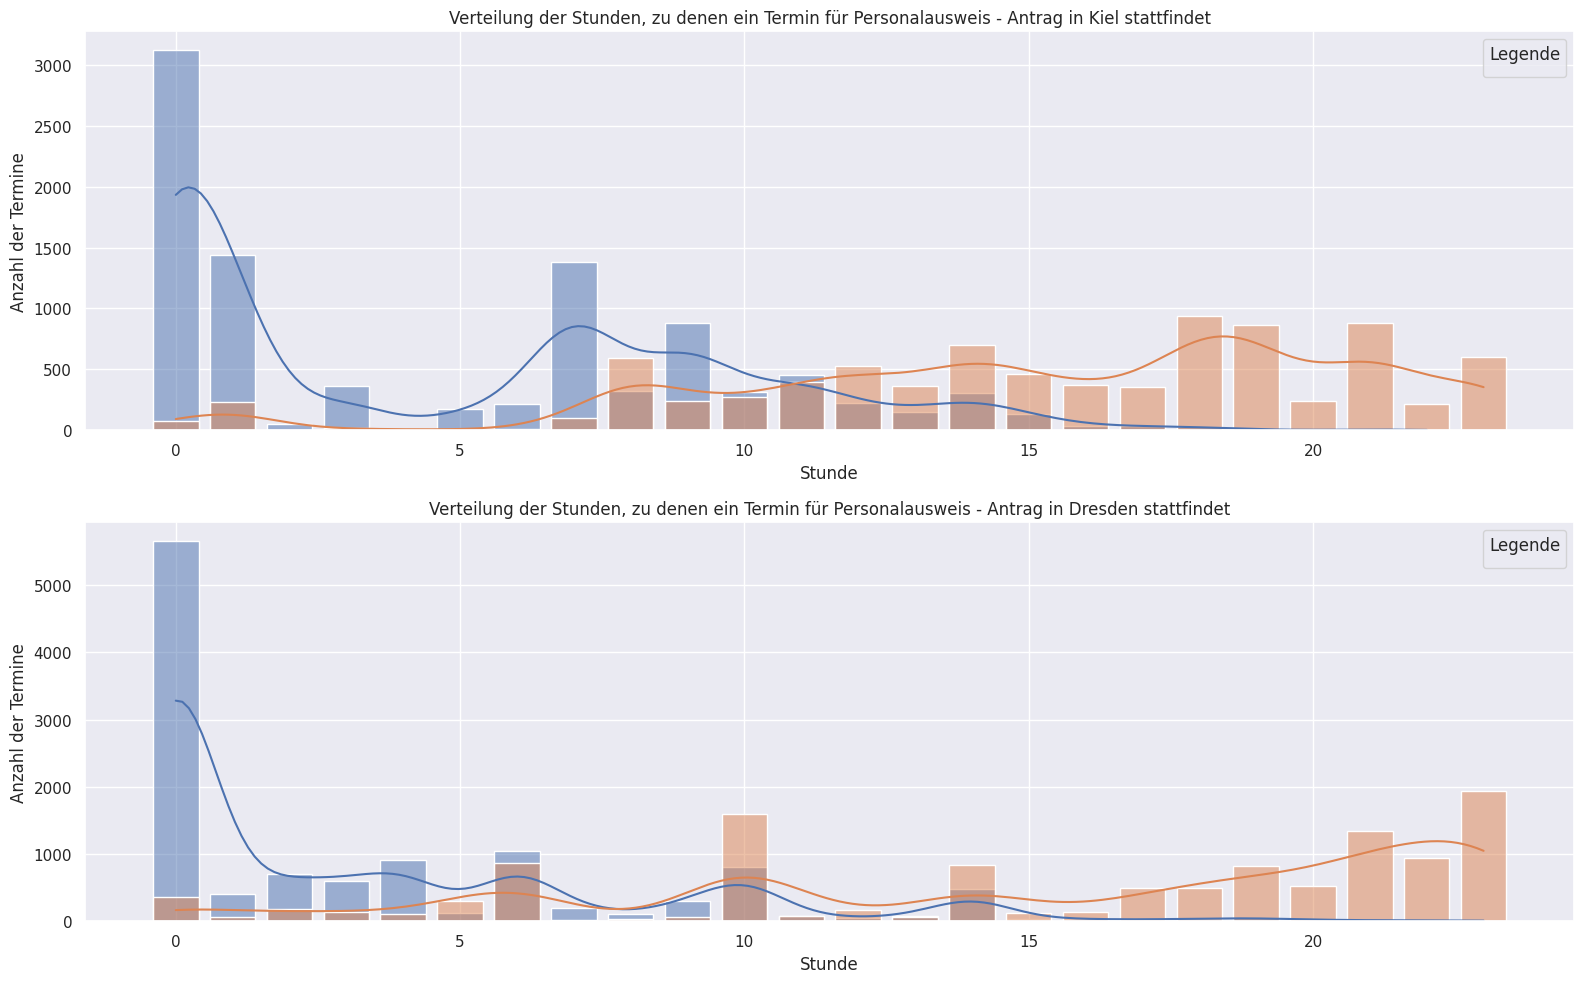

In [ ]:
fig, axs = plt.subplots(figsize=(16, 10), nrows=2, ncols=1)

for index, (city, first, taken) in enumerate(
    zip(["Kiel", "Dresden"], [kiel_only_first_available, dresden_only_first_available], [kiel_only_last_taken, dresden_only_last_taken])
):
    
    sns.histplot(
        data=first,
        x="available_hour",
        ax=axs[index],
        discrete=True,
        kde=True,
        shrink=0.8,
    )

    sns.histplot(
        data=taken,
        x="taken_hour",
        ax=axs[index],
        discrete=True,
        kde=True,
        shrink=0.8,
    )

    axs[index].set_title(
        f"Verteilung der Stunden, zu denen ein Termin für {concern} in {city} stattfindet"
    )

    axs[index].set_xlabel("Stunde")
    axs[index].set_ylabel("Anzahl der Termine")
    axs[index].legend(
        title="Legende",
        handles=axs[index].get_legend_handles_labels()[0],
        labels=["Erste Verfügbarkeit", "Letzte Buchung"],
    )


plt.tight_layout()


plt.show()
